### Import all necessary library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from random import randint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import cifar10
from keras import Input, Model
from skimage.transform import resize

In [3]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
print(X_train.max())
print(X_train.min())
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.max())
print(X_train.min())

255
0
1.0
0.0


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print('Y Training shape: ',y_train.shape)
print('Y Testing shape: ',y_test.shape)

Y Training shape:  (50000,)
Y Testing shape:  (10000,)


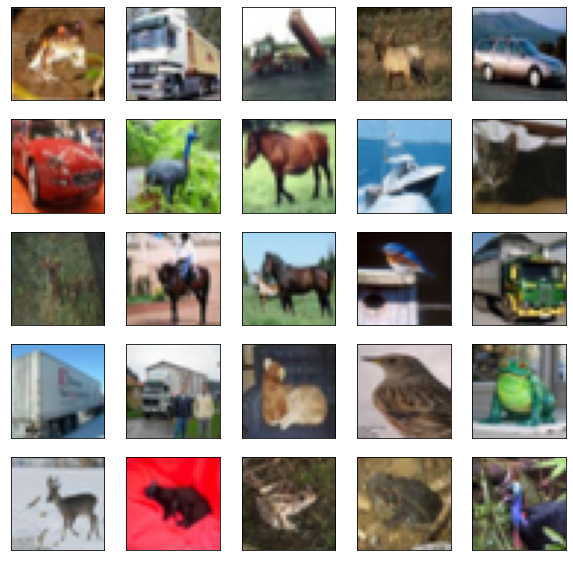

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    
plt.show()

In [7]:
input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)



In [9]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer ='adam', loss ='binary_crossentropy')

In [10]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584   

In [ ]:
def resize_all(x, shape = (28,28)):
    band_shape = x.shape
    x_resize = np.zeros(shape = (band_shape[0],shape[0],shape[1]))
    for i in range(band_shape[0]):
        x_resize[i] = resize(x[i], shape)
    return x_resize

def transform_input_vgg(x):
    x_vgg = np.array(x).reshape(-1,32,32,3)
    x_vgg = resize_all(x_vgg, (28,28,1))
    x_vgg = np.repeat(x_vgg[:, :, :, np.newaxis], 3, axis=3)
#    x_vgg = preprocess_input(x_vgg)
    return x_vgg

In [ ]:
X_train = transform_input_vgg(X_train)
X_test = transform_input_vgg(X_test)

In [11]:
history = autoencoder.fit(X_train,X_train,epochs=10,batch_size=256, shuffle=True, validation_data=(X_test,X_test))

Epoch 1/10
196/196 [==============================] - 60s 302ms/step - loss: 0.6296 - val_loss: 0.6054
Epoch 2/10
196/196 [==============================] - 58s 297ms/step - loss: 0.5978 - val_loss: 0.5938
Epoch 3/10
196/196 [==============================] - 69s 353ms/step - loss: 0.5912 - val_loss: 0.5901
Epoch 4/10
196/196 [==============================] - 54s 274ms/step - loss: 0.5885 - val_loss: 0.5889
Epoch 5/10
196/196 [==============================] - 53s 273ms/step - loss: 0.5870 - val_loss: 0.5872
Epoch 6/10
196/196 [==============================] - 57s 291ms/step - loss: 0.5860 - val_loss: 0.5867
Epoch 7/10
196/196 [==============================] - 55s 278ms/step - loss: 0.5853 - val_loss: 0.5856
Epoch 8/10
196/196 [==============================] - 54s 275ms/step - loss: 0.5846 - val_loss: 0.5849
Epoch 9/10
196/196 [==============================] - 54s 273ms/step - loss: 0.5839 - val_loss: 0.5844
Epoch 10/10
196/196 [==============================] - 53s 270ms/step - l

In [12]:
print("Training Accuracy")
print(autoencoder.evaluate(X_train,X_train))
print("Test accuracy")
print(autoencoder.evaluate(X_test,X_test))

Training Accuracy
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5837
0.5837126970291138
Test accuracy
313/313 [==============================] - 2s 7ms/step - loss: 0.5846
0.5846050381660461


In [13]:
pred = autoencoder.predict(X_test)

313/313 [==============================] - 2s 7ms/step


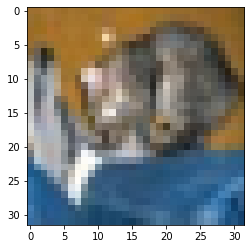

In [14]:
plt.imshow(X_test[0])

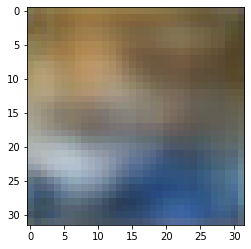

In [15]:
plt.imshow(pred[0])

In [20]:
def visualize(model, X_test):
      
    # Reconstructing the encoded images
    reconstructed_images = model.predict(X_test)
      
    plt.figure(figsize =(20, 4))
    for i in range(1, 11):
          
        # Generating a random to get random results
        rand_num = randint(0, 10001)
      
        # To display the original image
        ax = plt.subplot(2, 10, i)
        plt.imshow(X_test[rand_num].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
  
        # To display the reconstructed image
        ax = plt.subplot(2, 10, i + 10)
        plt.imshow(reconstructed_images[rand_num].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
          
    # Displaying the plot
    plt.show()

313/313 [==============================] - 2s 6ms/step


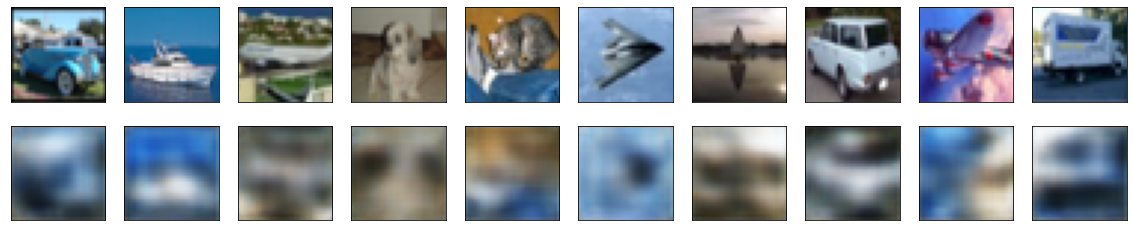

In [21]:
visualize(autoencoder, X_test)

KeyError: 'accuracy'

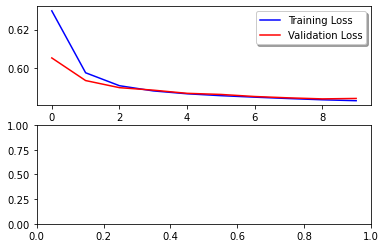

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True) 